In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [71]:
# Параметры
img_width, img_height = 48, 48
batch_size = 64
num_classes = 4  # angry, fear, happy, sad
epochs = 50

# Подготовка данных
def load_data(data_dir):
    images = []
    labels = []
    label_dict = {'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3}

    for label in os.listdir(data_dir):
        if label in label_dict:
            for img_file in os.listdir(os.path.join(data_dir, label)):
                img_path = os.path.join(data_dir, label, img_file)
                img = plt.imread(img_path)
                img = np.resize(img, (img_width, img_height, 1))  # Изменение размера до 48x48 и добавление канала
                images.append(img)
                labels.append(label_dict[label])

    return np.array(images), np.array(labels)


In [72]:
# Загрузка данных
train_data_dir = 'dataset/train'
test_data_dir = 'dataset/test'

X_train, y_train = load_data(train_data_dir)
X_test, y_test = load_data(test_data_dir)

# Нормализация данных
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Преобразование меток в категориальный формат
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [73]:
# Создание модели CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


C:\Users\Dim\PycharmProjects\holger_bro\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [75]:
# Обучение модели
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.3625 - loss: 1.3431 - val_accuracy: 0.4824 - val_loss: 1.1445
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.4958 - loss: 1.1356 - val_accuracy: 0.5409 - val_loss: 1.0373
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.5406 - loss: 1.0470 - val_accuracy: 0.5830 - val_loss: 0.9698
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.5904 - loss: 0.9668 - val_accuracy: 0.5878 - val_loss: 0.9566
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6086 - loss: 0.9160 - val_accuracy: 0.6064 - val_loss: 0.9142
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.6293 - loss: 0.8720 - val_accuracy: 0.6161 - val_loss: 0.8993
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6516 - loss: 0.8370 - val_accuracy: 0.6230 - val_loss: 0.8949
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6607 - loss: 0.8063 - 

In [76]:
# Оценка модели
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Прогнозирование
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


Test loss: 2.4634580612182617
Test accuracy: 0.6436665058135986
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


              precision    recall  f1-score   support

       angry       0.53      0.53      0.53       960
        fear       0.58      0.43      0.50      1018
       happy       0.82      0.84      0.83      1825
         sad       0.51      0.61      0.56      1139

    accuracy                           0.64      4942
   macro avg       0.61      0.60      0.60      4942
weighted avg       0.65      0.64      0.64      4942
[[ 510  103  115  232]
 [ 170  440   92  316]
 [  98   71 1533  123]
 [ 181  140  120  698]]


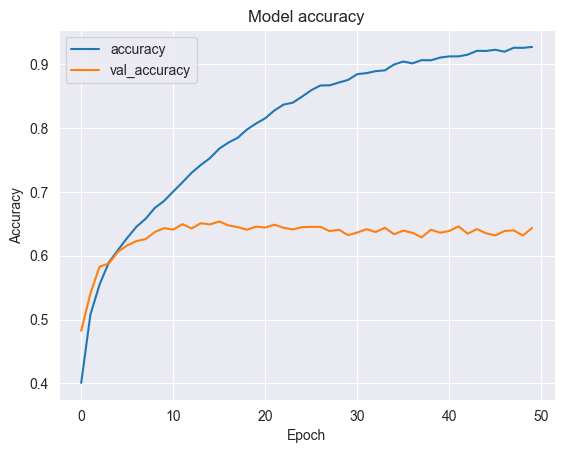

In [77]:
# Отчет о классификации
print(classification_report(y_true, y_pred_classes, target_names=['angry', 'fear', 'happy', 'sad']))
print(confusion_matrix(y_true, y_pred_classes))

# Визуализация результатов
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
